In [1]:
import numpy as np
from matplotlib import pyplot as plt   
import matplotlib.pyplot as plt
import pandas as pd
import math
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
import cv2
plt.style.use(astropy_mpl_style)
#plt.style.use("default")
#import sys
#sys.path.append('/Users/shaivi/mypy/')
import tvg
from matplotlib import pyplot, image, transforms
from scipy import ndimage
import skimage

from scipy import ndimage
import matplotlib.pyplot as plt

In [2]:
conti = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_conti_index.fits')
magincl = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_magincl_index.fits')
magfield = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_magfield_index.fits')
dopp = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_dopp1_index.fits')

num_scans = 59
dim = conti[1].data.shape
data_conti = np.zeros((dim[0], dim[1], num_scans))
data_magincl = np.zeros((dim[0], dim[1], num_scans))
data_Bz = np.zeros((dim[0], dim[1], num_scans))
#data_dopp = np.zeros((dim[0], dim[1], num_scans))

for i in range(num_scans):
    data_conti_temp = conti[i+1].data
    #data_conti_2=(data_conti_temp - data_conti_temp.min())*(255.0/(data_conti_temp - data_conti_temp.min()).max())
    #data_conti[:,:,i] = data_conti_2
    data_conti[:,:,i] = data_conti_temp
    np.save('/Users/shaivi/Downloads/test_conti.npy', data_conti)
   
    data_magincl_temp = magincl[i+1].data
    #data_magincl_2=(data_magincl_temp - data_magincl_temp.min())*(255.0/(data_magincl_temp - data_magincl_temp.min()).max())
    #data_magincl[:,:,i] = data_magincl_2
    data_magincl[:,:,i] = data_magincl_temp
    np.save('/Users/shaivi/Downloads/test_magincl.npy', data_magincl)

    data_magfield_temp = magfield[i+1].data
    Bz_temp =  data_magfield_temp*(np.cos(np.array(np.deg2rad(data_magincl_temp))))
    #data_Bz_2=(Bz_temp - Bz_temp.min())*(255.0/(Bz_temp - Bz_temp.min()).max())
    #data_Bz[:,:,i] = data_Bz_2
    data_Bz[:,:,i] = Bz_temp
    
    np.save('/Users/shaivi/Downloads/test_Bz.npy', data_Bz)
    
    #data_dopp_temp = dopp[i+1].data
    #data_dopp_2=(data_dopp_temp - data_dopp_temp.min())*(255.0/(data_dopp_temp - data_dopp_temp.min()).max())
    #data_dopp[:,:,i] = data_dopp_2
    #np.save('/Users/shaivi/Downloads/test_dopp1.npy', data_dopp)
    
dim = data_Bz.shape
alltogether = np.zeros((dim[0], dim[1]*3, dim[2]))
j = 0; alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_conti
j = 1 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_magincl
j = 2 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_Bz
#j = 3 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_dopp

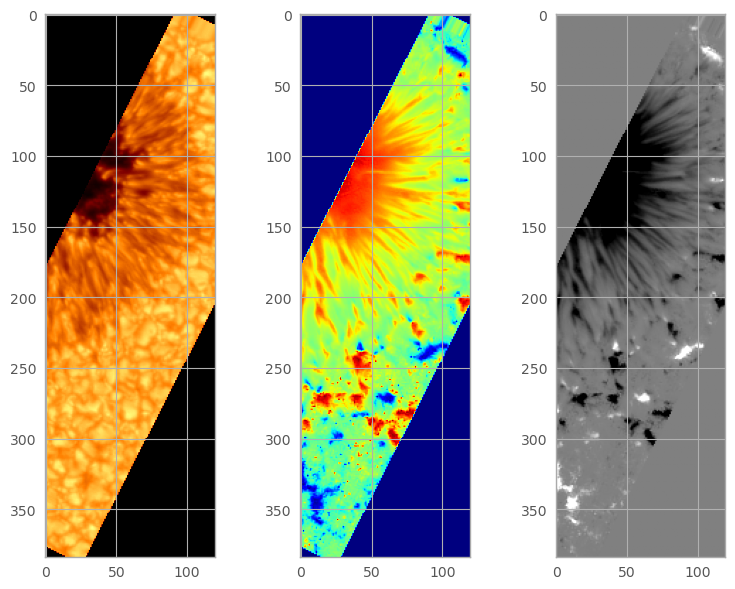

In [3]:
dc_rot = ndimage.rotate(data_conti, -27, reshape=False)
mi_rot = ndimage.rotate(data_magincl, -27, reshape=False)
bz_rot = ndimage.rotate(data_Bz, -27, reshape=False)

fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[:,:,35], cmap='afmhot', vmin=3e3, vmax=20e3)
#ax[0].set_axis_off()
ax[1].imshow(mi_rot[:,:,35], cmap='jet',  vmin=0, vmax=180)
#ax[1].set_axis_off()
ax[2].imshow(bz_rot[:,:,35], cmap='gray', vmin=-1250, vmax=1250)
#ax[2].set_axis_off()

fig.set_layout_engine('tight')
plt.show()

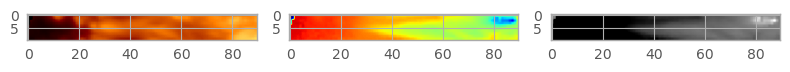

In [4]:
dc_rot = ndimage.rotate(data_conti, -27, reshape=False)
mi_rot = ndimage.rotate(data_magincl, -27, reshape=False)
bz_rot = ndimage.rotate(data_Bz, -27, reshape=False)

fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[115:125,30:,35], cmap='afmhot', vmin=3e3, vmax=20e3)
#ax[0].set_axis_off()
ax[1].imshow(mi_rot[115:125,30:,35], cmap='jet',  vmin=0, vmax=180)
#ax[1].set_axis_off()
ax[2].imshow(bz_rot[115:125,30:,35], cmap='gray', vmin=-1250, vmax=1250)
#ax[2].set_axis_off()

fig.set_layout_engine('tight')
plt.show()

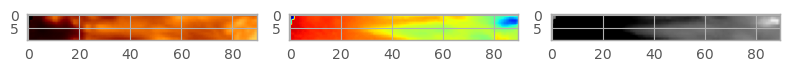

In [54]:
fig, ax = plt.subplots(1,3)
ax[0].imshow(dc_rot[115:125,30:,36], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[1].imshow(mi_rot[115:125,30:,36], cmap='jet',  vmin=0, vmax=180)
ax[2].imshow(bz_rot[115:125,30:,36], cmap='gray', vmin=-1250, vmax=1250)
#for j in range(3): ax[j].grid(False)
fig.set_layout_engine('tight')
test = plt.show()

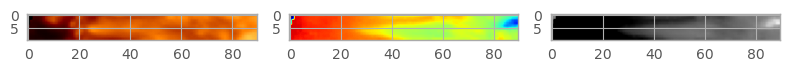

In [55]:
fig, ax = plt.subplots(1,3)
ax[0].imshow(dc_rot[115:125,30:,37], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[1].imshow(mi_rot[115:125,30:,37], cmap='jet',  vmin=0, vmax=180)
ax[2].imshow(bz_rot[115:125,30:,37], cmap='gray', vmin=-1250, vmax=1250)
#for j in range(3): ax[j].grid(False)
fig.set_layout_engine('tight')
test = plt.show()

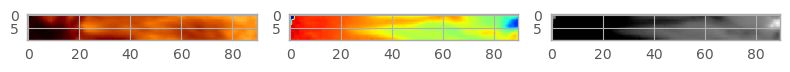

In [58]:
fig, ax = plt.subplots(1,3)
ax[0].imshow(dc_rot[116:126,30:,38], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[1].imshow(mi_rot[115:125,30:,38], cmap='jet',  vmin=0, vmax=180)
ax[2].imshow(bz_rot[115:125,30:,38], cmap='gray', vmin=-1250, vmax=1250)
#for j in range(3): ax[j].grid(False)
fig.set_layout_engine('tight')
test = plt.show()

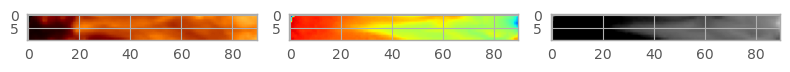

In [94]:
fig, ax = plt.subplots(1,3)
ax[0].imshow(dc_rot[116:126,30:,39], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[1].imshow(mi_rot[116:126,30:,39], cmap='jet',  vmin=0, vmax=180)
ax[2].imshow(bz_rot[116:126,30:,39], cmap='gray', vmin=-1250, vmax=1250)
#for j in range(3): ax[j].grid(False)
fig.set_layout_engine('tight')
test = plt.show()

In [67]:
#continuum intensity
dc_rot[116:126,30:,39][5][20:75]

array([11420.43847573, 11395.93108528, 11530.14105514, 11407.12506578,
       10969.96777509, 10563.92199567, 10210.42841751,  9971.20931303,
        9648.23634558,  9538.37572031,  9505.51364889,  9680.48014537,
        9881.92871648,  9925.85981   , 10051.05438131, 10221.07323638,
       10353.82458725, 10330.9587443 , 10345.51192512, 10323.60503726,
       10305.21870505, 10367.31063185, 10323.39220582, 10117.67689387,
       10063.85652824, 10139.88437036, 10105.57028622, 10083.11950189,
        9995.66271367,  9816.70221261,  9765.21891392,  9694.01192843,
        9691.29162975,  9845.78770439,  9796.27481803,  9544.95897126,
        9273.15211409,  9045.78614786,  8918.26371644,  8886.91648211,
        8990.0160722 ,  9111.61684686,  9270.26212062,  9386.75635939,
        9652.82165166,  9830.72088281,  9910.96354206,  9881.78194022,
        9896.31031212,  9968.71808664, 10071.61850864, 10001.84843728,
        9669.68458002,  9470.97945546,  9441.46522286])

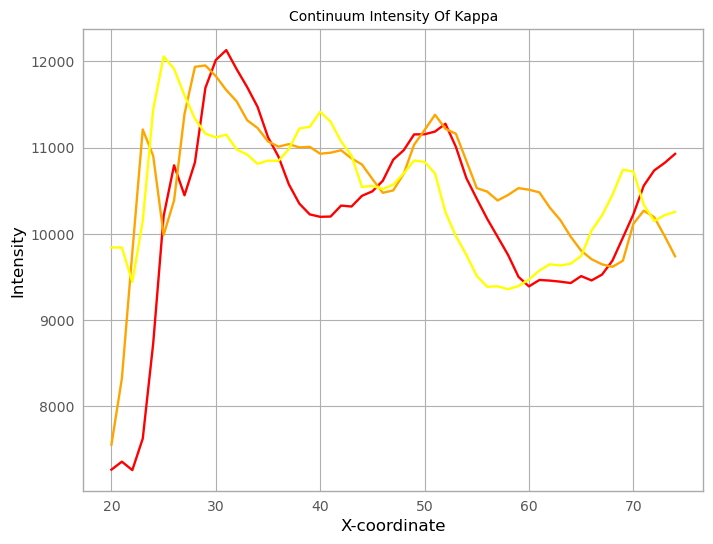

In [7]:
#vertical index [5]
dc_y0 = np.array([ 7267.06087152,  7359.44474855,  7261.57997235,  7627.09040219,
        8729.96634452, 10206.48929406, 10795.09621319, 10447.12180391,
       10829.21783602, 11691.59155947, 12015.45924518, 12130.19123046,
       11907.857591  , 11701.91451175, 11472.12550683, 11120.26017211,
       10895.48350996, 10573.49392861, 10350.90064453, 10225.89816288,
       10197.69835478, 10200.92512533, 10328.05336935, 10317.03683612,
       10441.11831005, 10493.36771804, 10616.12046412, 10860.26087892,
       10969.61294402, 11153.06534736, 11154.55572523, 11185.82075033,
       11276.68463496, 11008.25080188, 10647.64518518, 10406.79701505,
       10174.1721886 ,  9965.61096739,  9755.81240111,  9501.54105097,
        9391.06775236,  9465.66330841,  9458.4073853 ,  9445.98186139,
        9430.08754558,  9510.53346734,  9460.46722259,  9527.98282686,
        9689.93880731,  9956.78394601, 10225.39483725, 10558.52811224,
       10735.38756532, 10822.90689595, 10927.58974653])
dc_x0 = range(20,75)

#vertical index [5]
dc_y1 = np.array([ 7556.74712231,  8324.2958497 ,  9782.81840085, 11210.03639272,
       10904.60351777,  9988.48385877, 10387.15241792, 11390.33999997,
       11936.48337158, 11952.38657032, 11828.0802908 , 11667.4060014 ,
       11535.06292078, 11317.64848727, 11227.06728267, 11071.28458347,
       11011.33870397, 11040.18649375, 11002.52619116, 11008.9072711 ,
       10928.79771142, 10940.91690569, 10969.57271041, 10874.73702631,
       10804.6193755 , 10635.99531157, 10476.15812235, 10504.05536172,
       10696.62163306, 11033.97553726, 11203.42303568, 11380.79154942,
       11217.78702524, 11160.72869683, 10847.90187515, 10530.86459163,
       10489.90309048, 10387.04429873, 10451.14779358, 10530.36284509,
       10511.941093  , 10481.03524017, 10304.09492309, 10161.02576663,
        9967.44526894,  9805.29453381,  9706.12623233,  9646.73445551,
        9618.08408037,  9688.91236499, 10115.70752568, 10269.36990934,
       10193.35988328,  9974.745797  ,  9740.45675487])
dc_x1 = range(20,75)

#vertical index [5]
dc_y2 = np.array([ 9842.43429652,  9842.05323806,  9444.60483813, 10150.49866455,
       11442.90107594, 12056.33676083, 11912.78239038, 11606.15583264,
       11333.94318461, 11161.96252   , 11118.46039532, 11149.81214809,
       10978.48660773, 10919.13722331, 10811.9544616 , 10849.33312563,
       10846.23096379, 10983.22517454, 11221.16805483, 11241.29628363,
       11414.22720614, 11299.60580111, 11071.47532507, 10906.55997556,
       10544.48368841, 10556.4878111 , 10519.1791642 , 10570.93486242,
       10700.6641385 , 10850.55405759, 10834.7388219 , 10700.13316262,
       10250.43919261,  9975.59089618,  9757.47709199,  9513.1045813 ,
        9386.51574253,  9392.45454344,  9358.61737271,  9395.07081268,
        9471.66708911,  9574.06996943,  9647.79640208,  9633.51052007,
        9654.94436429,  9742.24112364, 10039.27620351, 10213.39520174,
       10452.17193351, 10744.28559828, 10722.36101854, 10336.94143919,
       10149.77651794, 10217.27364143, 10255.58593924])
dc_x2 = range(20,75)

#vertical index [5]
dc_y3 = np.array([ 8651.81071633,  9580.0081808 , 10918.36388889, 11674.69215489,
       11737.43747049, 11596.04958544, 11269.00995622, 10908.14432441,
       10633.48777176, 10324.58833893,  9940.26083423,  9767.95176199,
        9539.78806925,  9538.0223386 ,  9565.52556662,  9700.82301707,
        9961.5358261 , 10175.52253602, 10346.68062328, 10389.23345044,
       10220.27093304, 10235.76998084, 10126.86084525,  9935.86979044,
        9761.46594083,  9680.61295643,  9733.83823259,  9947.40608156,
       10363.15547971, 10764.8012123 , 10870.52169997, 10738.25117715,
       10635.26711479, 10618.00338829, 10360.75218514, 10243.47014438,
        9892.27863026,  9549.05754519,  9299.13418102,  9084.49095567,
        9042.19448483,  9109.37062894,  9306.77800179,  9519.09899915,
        9487.38843083,  9064.72100752,  8524.37885676,  8369.13312002,
        8721.68792797,  9115.5945331 ,  9384.51431102,  9474.01955139,
        9475.77743923,  9342.49730962,  9418.82333132])
dc_x3 = range(20,75)

#vertical index[5]
dc_y4 = np.array([11420.43847573, 11395.93108528, 11530.14105514, 11407.12506578,
       10969.96777509, 10563.92199567, 10210.42841751,  9971.20931303,
        9648.23634558,  9538.37572031,  9505.51364889,  9680.48014537,
        9881.92871648,  9925.85981   , 10051.05438131, 10221.07323638,
       10353.82458725, 10330.9587443 , 10345.51192512, 10323.60503726,
       10305.21870505, 10367.31063185, 10323.39220582, 10117.67689387,
       10063.85652824, 10139.88437036, 10105.57028622, 10083.11950189,
        9995.66271367,  9816.70221261,  9765.21891392,  9694.01192843,
        9691.29162975,  9845.78770439,  9796.27481803,  9544.95897126,
        9273.15211409,  9045.78614786,  8918.26371644,  8886.91648211,
        8990.0160722 ,  9111.61684686,  9270.26212062,  9386.75635939,
        9652.82165166,  9830.72088281,  9910.96354206,  9881.78194022,
        9896.31031212,  9968.71808664, 10071.61850864, 10001.84843728,
        9669.68458002,  9470.97945546,  9441.46522286])
dc_x4 = range(20,75)

plt.title("Continuum Intensity Of Kappa")
plt.xlabel("X-coordinate")
plt.ylabel("Intensity")
plt.plot(dc_x0,dc_y0, color="red")
plt.plot(dc_x1,dc_y1, color="orange")
plt.plot(dc_x2,dc_y2, color="yellow")
#plt.plot(dc_x3,dc_y3, color="pink")
#plt.plot(dc_x4,dc_y4, color="purple")

plt.show()

In [79]:
##magnetic inclinaton
mi_rot[116:126,30:,39][5][20:75]

array([140.62183442, 139.61014214, 137.10070654, 135.67365209,
       132.45387338, 130.24785613, 128.50767331, 124.58304672,
       122.87583027, 120.32933293, 119.60746017, 116.94817956,
       116.10411106, 116.24314372, 115.38766263, 113.68993811,
       111.78036933, 110.57578523, 109.92169189, 108.2157239 ,
       107.29571244, 106.81067067, 106.40037071, 105.94083179,
       105.58705679, 104.73749527, 103.96789466, 104.87556128,
       103.89218904, 103.56279904, 103.20944908, 104.41545473,
       104.0151235 , 103.36321497, 104.503082  , 106.24490072,
       107.63077055, 107.52616754, 109.2388823 , 110.1833847 ,
       109.42983237, 108.97598581, 106.92072345, 105.40126365,
       103.84046715, 100.99604612, 100.67993128,  99.39876308,
        98.71294249,  97.24596031,  96.7640002 ,  98.23878209,
        98.52435697,  99.80040208,  98.84228155])

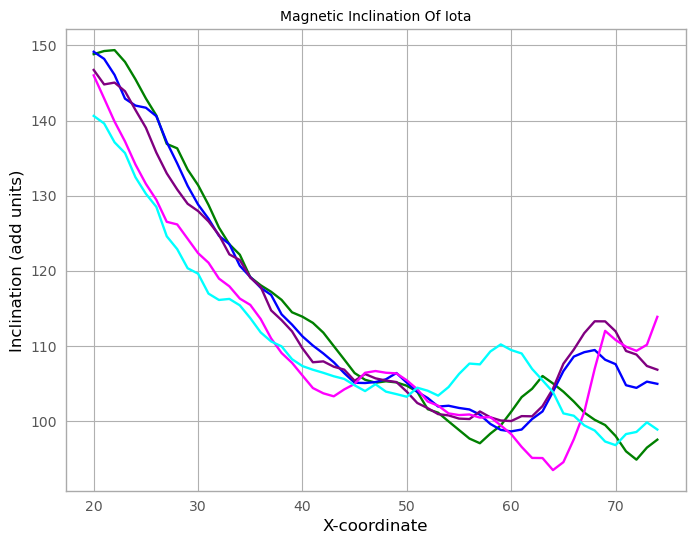

In [80]:
#vertical index [5]
mi_y0 = np.array([148.84396008, 149.26047005, 149.38434163, 147.81377907,
       145.49780154, 142.94500099, 140.68326918, 136.88802476,
       136.30338462, 133.46833703, 131.40137516, 128.76780906,
       125.74968648, 123.52054822, 122.13299759, 119.14943084,
       118.0618402 , 117.19307633, 116.11818115, 114.46388556,
       113.87433173, 113.05247766, 111.75385865, 109.96222383,
       108.18029493, 106.3659202 , 105.4739455 , 105.0814003 ,
       105.27047444, 105.12330185, 104.67735688, 103.87696733,
       101.55521191, 101.08781399,  99.92549358,  98.78207958,
        97.6409074 ,  97.01880145,  98.29633229,  99.39131595,
       101.22056411, 103.16449371, 104.26821129, 105.97657033,
       104.98538353, 103.8871027 , 102.57141952, 101.10179337,
       100.13814618,  99.44171295,  97.98874107,  95.94187113,
        94.83300161,  96.43579439,  97.49569951])
mi_x0 = range(20,75)

#vertical index [5]
mi_y1 = np.array([149.16250727, 148.21719639, 146.07940733, 142.91565671,
       141.99676422, 141.71031363, 140.58971228, 137.12610338,
       134.29841082, 131.30261481, 128.82053938, 126.92434527,
       124.64927687, 123.53469643, 120.65846495, 119.16488712,
       117.72648915, 116.77174185, 114.18830913, 112.81960074,
       111.2576833 , 110.0312069 , 108.97651367, 107.8070672 ,
       106.36060181, 105.0779803 , 105.04006149, 105.16645324,
       105.53997076, 106.37212234, 105.08711946, 103.86168954,
       103.04504312, 101.90358085, 102.01334679, 101.71856801,
       101.51954631, 100.82650737,  99.59014475,  98.79811926,
        98.59558677,  98.84565797, 100.24063357, 101.2581621 ,
       103.87498636, 106.62912107, 108.56350149, 109.14783532,
       109.43465058, 108.1438338 , 107.55129672, 104.74583662,
       104.39473303, 105.22433709, 104.931859  ])
mi_x1 = range(20,75)

#vertical index [5]
mi_y2 = np.array([146.74147696, 144.8137564 , 145.05817262, 143.90263167,
       141.41456368, 139.04385044, 135.73800048, 132.96754761,
       130.82563533, 128.91476831, 127.9481463 , 126.57002625,
       124.7623733 , 122.17387973, 121.41934745, 119.08659401,
       117.84383716, 114.71587703, 113.41677076, 111.92774434,
       109.6660781 , 107.80503393, 107.92278603, 107.21354957,
       106.82615528, 105.34290725, 106.23884367, 105.66384249,
       105.36809759, 105.17215666, 103.8787554 , 102.38308504,
       101.69323856, 100.89753196, 100.72864507, 100.30090512,
       100.24263753, 101.25224178, 100.47518561, 100.04839749,
        99.97587626, 100.63000479, 100.6049315 , 101.96511966,
       104.27860883, 107.61043873, 109.50252034, 111.68555147,
       113.26231053, 113.252547  , 111.92635208, 109.30963984,
       108.83174245, 107.3124674 , 106.8145386 ])
mi_x2 = range(20,75)

#vertical index [5]
mi_y3 = np.array([146.01409105, 142.94959749, 139.85979655, 137.21840617,
       134.15112876, 131.56416756, 129.44740285, 126.51331121,
       126.16638872, 124.25600158, 122.3386388 , 121.06365898,
       118.95121458, 117.9187946 , 116.2888454 , 115.4496724 ,
       113.56390999, 110.97970937, 109.03989044, 107.73296479,
       106.03764536, 104.37197198, 103.66873943, 103.26906574,
       104.18591869, 104.91927774, 106.40734692, 106.63816024,
       106.40830359, 106.32532854, 105.39978496, 104.20959999,
       102.578207  , 102.02606378, 100.99418981, 100.77070753,
       100.85003421, 100.43648822, 100.49911238,  99.39531878,
        98.22929054,  96.53175225,  95.06338943,  95.0453912 ,
        93.43985831,  94.4996722 ,  97.54978868, 101.18094414,
       106.94047546, 111.988425  , 110.77571117, 109.87242585,
       109.32680571, 110.13486332, 113.85858356])
mi_x3 = range(20,75)

#vertical index [5]
mi_y4 = np.array([140.62183442, 139.61014214, 137.10070654, 135.67365209,
       132.45387338, 130.24785613, 128.50767331, 124.58304672,
       122.87583027, 120.32933293, 119.60746017, 116.94817956,
       116.10411106, 116.24314372, 115.38766263, 113.68993811,
       111.78036933, 110.57578523, 109.92169189, 108.2157239 ,
       107.29571244, 106.81067067, 106.40037071, 105.94083179,
       105.58705679, 104.73749527, 103.96789466, 104.87556128,
       103.89218904, 103.56279904, 103.20944908, 104.41545473,
       104.0151235 , 103.36321497, 104.503082  , 106.24490072,
       107.63077055, 107.52616754, 109.2388823 , 110.1833847 ,
       109.42983237, 108.97598581, 106.92072345, 105.40126365,
       103.84046715, 100.99604612, 100.67993128,  99.39876308,
        98.71294249,  97.24596031,  96.7640002 ,  98.23878209,
        98.52435697,  99.80040208,  98.84228155])
mi_x4 = range(20,75)

plt.title("Magnetic Inclination Of Kappa")
plt.xlabel("X-coordinate")
plt.ylabel("Inclination (add units)")
plt.plot(mi_x0,mi_y0, color="green")
plt.plot(mi_x1,mi_y1, color="blue")
plt.plot(mi_x2,mi_y2, color="purple")
plt.plot(mi_x3,mi_y3, color="magenta")
plt.plot(mi_x4,mi_y4, color="cyan")

In [86]:
#Bz plots
bz_rot[116:126,30:,39][5][20:75]

array([-1452.27145025, -1364.45077858, -1221.8372759 , -1144.4091    ,
       -1018.47731472,  -938.9457334 ,  -893.3447779 ,  -747.04147141,
        -708.73916023,  -661.2452586 ,  -638.01022656,  -561.73728539,
        -526.88936284,  -525.32505835,  -516.42258697,  -472.80488681,
        -438.16090124,  -426.07367502,  -414.31541791,  -380.48676993,
        -365.01982784,  -355.95759976,  -341.82626372,  -328.57574597,
        -315.72855356,  -306.63630048,  -288.07211901,  -302.30465617,
        -274.09891707,  -260.20664322,  -246.35223166,  -259.94773317,
        -255.77701215,  -240.84521135,  -259.82927889,  -290.02526919,
        -320.69709162,  -314.56298121,  -328.08506037,  -336.07830375,
        -332.60658207,  -345.79322717,  -307.42580321,  -273.79936275,
        -251.33799779,  -199.64958747,  -193.3488873 ,  -169.626132  ,
        -154.18078968,  -126.9091452 ,  -116.67931439,  -140.69409429,
        -146.57499753,  -155.96904996,  -141.81206294])

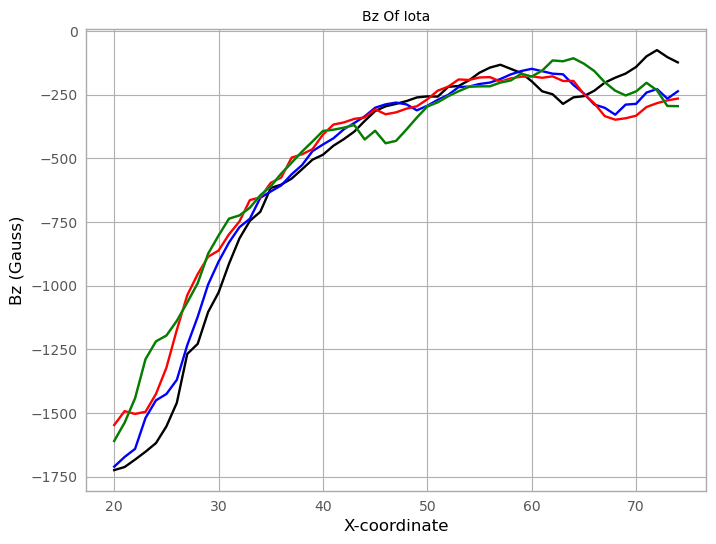

In [90]:
#vertical index [5]
bz_y0 = np.array([-1724.68686088, -1712.46618703, -1683.37741475, -1652.50971974,
       -1618.68268835, -1553.08223098, -1460.51648304, -1268.50581942,
       -1228.95684472, -1103.71876182, -1027.26089605,  -914.43268445,
        -814.97243875,  -745.74726298,  -710.19391433,  -616.59288015,
        -603.7174507 ,  -579.94873515,  -543.15659055,  -505.54350114,
        -486.31503232,  -451.04770377,  -425.06735595,  -395.49606185,
        -353.5599705 ,  -314.86809231,  -296.15599511,  -286.58680422,
        -275.56887848,  -261.30631056,  -257.08789654,  -258.13124106,
        -219.75562019,  -216.24277176,  -193.90991926,  -164.0490482 ,
        -144.06414738,  -132.86567599,  -149.13695647,  -165.52340525,
        -197.77971558,  -237.15818103,  -248.75046545,  -286.53865307,
        -260.85601097,  -256.21077621,  -234.78498324,  -203.2001819 ,
        -183.74281155,  -167.54535153,  -141.53239703,   -99.78280308,
         -75.41889644,  -103.02309008,  -123.72673792])
bz_x0 = range(20,75)

#vertical index [5]
bz_y1 = np.array([-1711.23965252, -1672.97903069, -1641.33096997, -1519.89849737,
       -1450.73139062, -1425.90327927, -1370.19388602, -1234.00344296,
       -1122.58744956,  -995.65687238,  -906.20201123,  -830.73912442,
        -770.832012  ,  -737.53453052,  -655.2186216 ,  -630.52107676,
        -606.84096588,  -563.01944871,  -526.73457734,  -472.20492738,
        -445.99569618,  -421.93296854,  -386.43043119,  -361.6107571 ,
        -335.55628412,  -301.72949848,  -288.42569761,  -281.48135245,
        -288.59070842,  -311.86480056,  -293.82388938,  -270.70701915,
        -251.16664528,  -220.63758914,  -218.54153044,  -208.38625735,
        -202.88739289,  -188.93382742,  -170.71640078,  -157.51273963,
        -148.88309253,  -158.06314665,  -167.94046761,  -170.36071615,
        -212.17695588,  -245.78812336,  -289.20993386,  -302.00527484,
        -329.05135283,  -289.43060676,  -286.40966306,  -242.00115216,
        -228.32714194,  -265.91414891,  -237.07434106])
bz_x1 = range(20,75)

#vertical index [5]
bz_y2 = np.array([-1547.68165315, -1493.162831  , -1504.01931047, -1495.60349464,
       -1425.86527973, -1322.79532784, -1174.12565493, -1037.77053113,
        -955.20999453,  -886.8303734 ,  -862.51233132,  -798.61930678,
        -748.43043519,  -664.25269524,  -653.7711069 ,  -596.5657045 ,
        -575.90757572,  -497.56047943,  -484.51461151,  -464.21107313,
        -407.07879902,  -367.89014036,  -359.37815661,  -345.53244591,
        -339.92153509,  -307.75610979,  -327.4137458 ,  -319.88679696,
        -305.315698  ,  -295.87987332,  -268.78911651,  -234.62464603,
        -218.93060205,  -190.66124995,  -192.54484659,  -182.85069122,
        -181.47377111,  -198.95010896,  -186.45363703,  -179.80484638,
        -178.51371935,  -184.10177711,  -178.42277193,  -196.5746292 ,
        -196.40512599,  -248.3047869 ,  -284.64800675,  -334.59871212,
        -348.65943132,  -343.0433203 ,  -332.9637531 ,  -298.84325923,
        -283.78922288,  -272.75224375,  -265.82468491])
bz_x2 = range(20,75)

#vertical index [5]
bz_y3 = np.array([-1610.28213795, -1538.33484457, -1442.51409866, -1289.02491708,
       -1219.2152046 , -1196.26092957, -1138.54247751, -1066.18718709,
        -990.88685518,  -874.84858773,  -803.51352625,  -737.30556849,
        -724.5530233 ,  -694.26887638,  -645.72813883,  -609.95316771,
        -560.48081853,  -517.46238079,  -473.82112012,  -434.0280391 ,
        -392.96438323,  -388.04576129,  -379.99402537,  -369.67874966,
        -426.21361658,  -392.05124612,  -441.17885426,  -431.81953634,
        -387.19753097,  -340.09076627,  -296.96675212,  -280.29706317,
        -256.56792256,  -236.81079131,  -219.41567251,  -217.64045939,
        -217.48455625,  -202.83986978,  -194.53338098,  -168.27628668,
        -179.1872093 ,  -155.99751398,  -116.00463665,  -119.2840977 ,
        -107.4365026 ,  -128.67707056,  -157.7011847 ,  -201.64200437,
        -234.63853168,  -253.49429723,  -237.61106633,  -203.77455012,
        -233.29565357,  -294.82816308,  -295.43173012])
bz_x3 = range(20,75)
                  
#vertical index [5]
bz_y4 = np.array([-1452.27145025, -1364.45077858, -1221.8372759 , -1144.4091    ,
       -1018.47731472,  -938.9457334 ,  -893.3447779 ,  -747.04147141,
        -708.73916023,  -661.2452586 ,  -638.01022656,  -561.73728539,
        -526.88936284,  -525.32505835,  -516.42258697,  -472.80488681,
        -438.16090124,  -426.07367502,  -414.31541791,  -380.48676993,
        -365.01982784,  -355.95759976,  -341.82626372,  -328.57574597,
        -315.72855356,  -306.63630048,  -288.07211901,  -302.30465617,
        -274.09891707,  -260.20664322,  -246.35223166,  -259.94773317,
        -255.77701215,  -240.84521135,  -259.82927889,  -290.02526919,
        -320.69709162,  -314.56298121,  -328.08506037,  -336.07830375,
        -332.60658207,  -345.79322717,  -307.42580321,  -273.79936275,
        -251.33799779,  -199.64958747,  -193.3488873 ,  -169.626132  ,
        -154.18078968,  -126.9091452 ,  -116.67931439,  -140.69409429,
        -146.57499753,  -155.96904996,  -141.81206294])
bz_x4 = range(20,75)
                  
plt.title("Bz Of Kappa")
plt.xlabel("X-coordinate")
plt.ylabel("Bz (Gauss)")
plt.plot(bz_x0,bz_y0, color="black")
plt.plot(bz_x1,bz_y1, color="blue")
plt.plot(bz_x2,bz_y2, color="red")
plt.plot(bz_x3,bz_y3, color="pink")
plt.plot(bz_x3,bz_y3, color="green")

plt.show()